In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# EDA

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: xlabel='HeartDisease'>

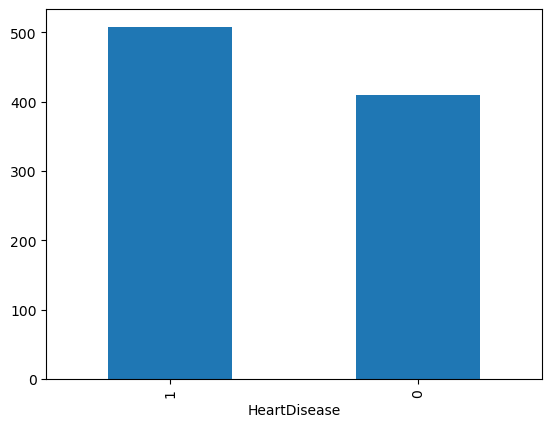

In [9]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

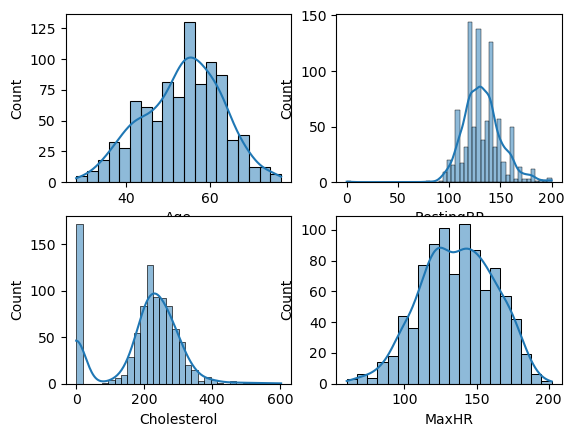

In [10]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var] ,kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

In [11]:
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [12]:
Cholesterol_mean = df[df['Cholesterol']!=0]['Cholesterol'].mean()

In [13]:
df['Cholesterol'] = df['Cholesterol'].replace(0,Cholesterol_mean)

In [14]:
RestingBP_mean = df[df['RestingBP']!=0]['RestingBP'].mean()

In [15]:
df['RestingBP'] = df['RestingBP'].replace(0,RestingBP_mean)

<Axes: xlabel='Sex', ylabel='count'>

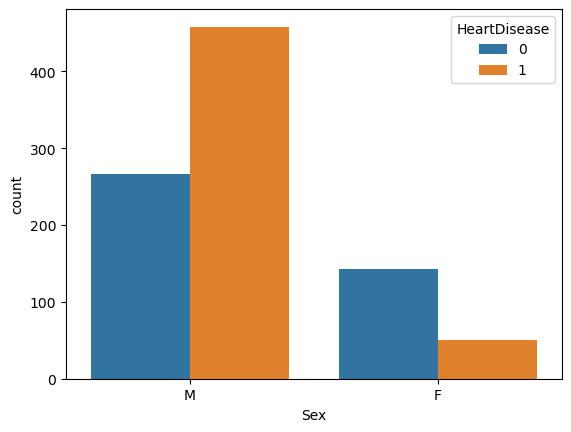

In [16]:
sns.countplot(x = df['Sex'],hue= df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

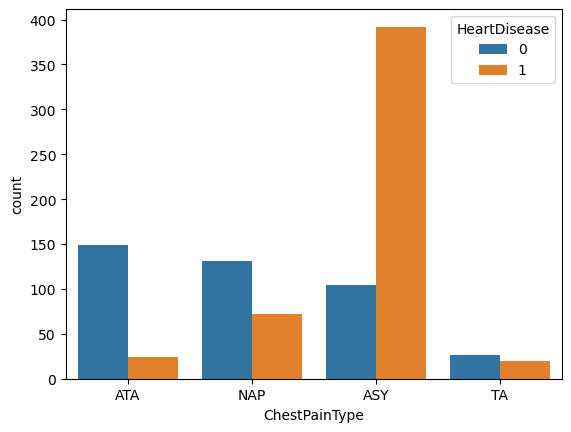

In [17]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

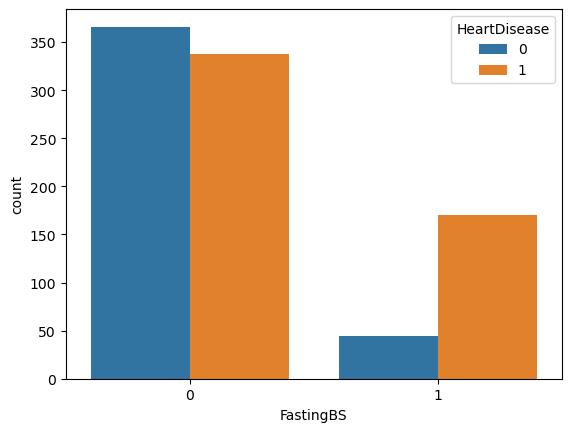

In [18]:
sns.countplot(x = df['FastingBS'], hue=df['HeartDisease'])

<Axes: xlabel='ST_Slope', ylabel='count'>

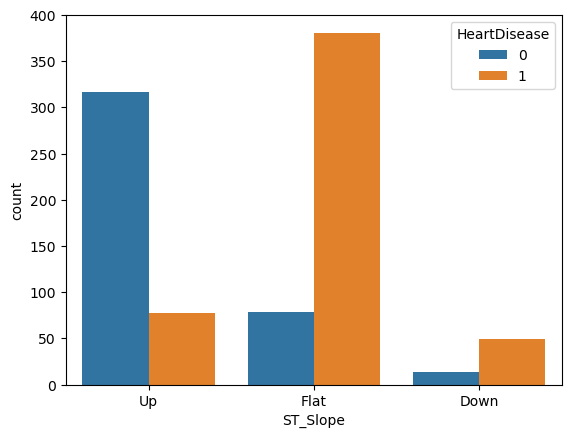

In [19]:
sns.countplot(x = df['ST_Slope'], hue = df['HeartDisease'])

<Axes: xlabel='RestingECG', ylabel='count'>

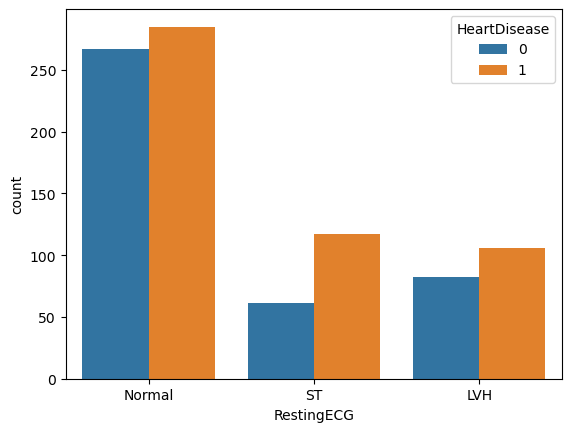

In [20]:
sns.countplot(x = df['RestingECG'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

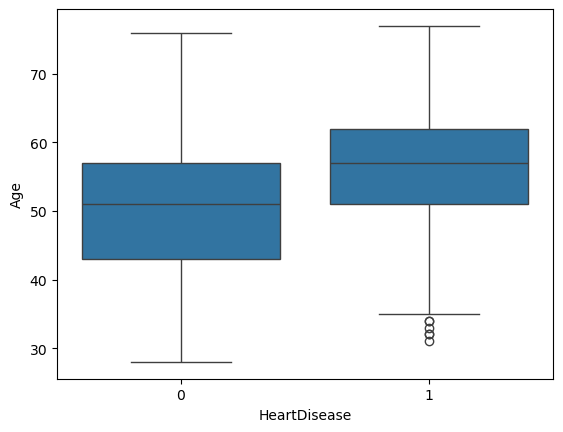

In [21]:
sns.boxplot(x = df['HeartDisease'],y = df['Age'])

In [22]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


<Axes: >

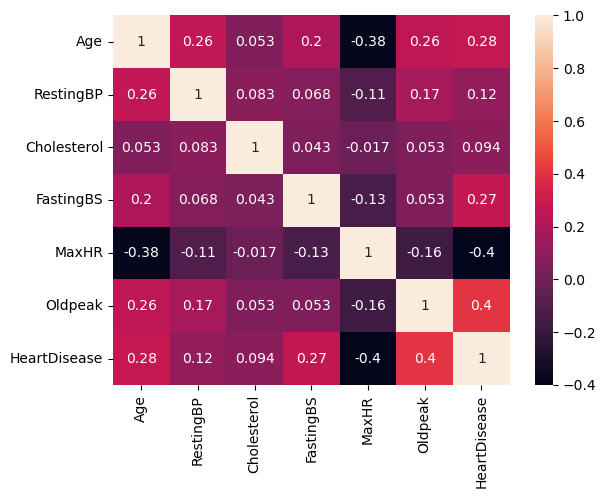

In [23]:
sns.heatmap(df.corr(numeric_only = True),annot=True)

In [24]:
 df.corr(numeric_only = True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.263081,0.053373,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.263081,1.000000,0.083076,0.067811,-0.109662,0.174220,0.117938
Cholesterol,0.053373,0.083076,1.000000,0.043008,-0.017239,0.053029,0.094071
FastingBS,0.198039,0.067811,0.043008,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.109662,-0.017239,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.174220,0.053029,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.117938,0.094071,0.267291,-0.400421,0.403951,1.000000


# Data Preprocessing

In [25]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


In [26]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [27]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [28]:
df_encoded = df_encoded.astype(int)

In [29]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [40]:
numeric_columns = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

In [41]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253622,0.365619,0,-0.188999,0.282891,1,1,0,0,1,1,0,0,1,0
914,1.536902,0.637353,-0.966725,1,0.164684,2.303858,1,1,0,0,0,1,0,0,1,0
915,0.370100,-0.141284,-2.130180,0,-0.857069,0.282891,1,1,0,0,0,1,0,1,1,0
916,0.370100,-0.141284,-0.159813,0,1.461525,-0.727592,1,0,1,0,0,0,0,0,1,0


In [42]:
X  = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [45]:
modelS = {
    "Logistic Regression" : LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Byeas" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "SVM" : SVC(probability=True) 
}

In [53]:
result = []

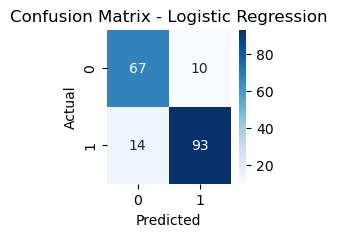

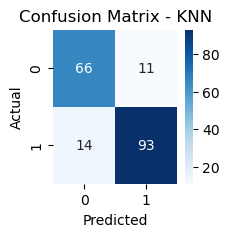

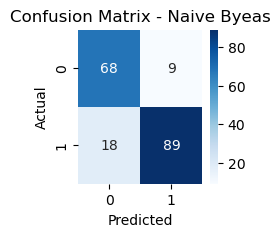

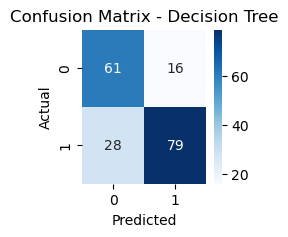

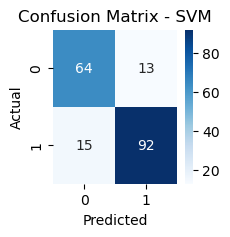

In [54]:
for name,model in modelS.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    result.append({
        'model':name,
        'Accuracy':round(acc,4),
        "f1 score":round(f1,4)
    })
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [55]:
result

[{'model': 'Logistic Regression', 'Accuracy': 0.8696, 'f1 score': 0.8857},
 {'model': 'KNN', 'Accuracy': 0.8641, 'f1 score': 0.8815},
 {'model': 'Naive Byeas', 'Accuracy': 0.8533, 'f1 score': 0.8683},
 {'model': 'Decision Tree', 'Accuracy': 0.7609, 'f1 score': 0.7822},
 {'model': 'SVM', 'Accuracy': 0.8478, 'f1 score': 0.8679}]

In [56]:
result

[{'model': 'Logistic Regression', 'Accuracy': 0.8696, 'f1 score': 0.8857},
 {'model': 'KNN', 'Accuracy': 0.8641, 'f1 score': 0.8815},
 {'model': 'Naive Byeas', 'Accuracy': 0.8533, 'f1 score': 0.8683},
 {'model': 'Decision Tree', 'Accuracy': 0.7609, 'f1 score': 0.7822},
 {'model': 'SVM', 'Accuracy': 0.8478, 'f1 score': 0.8679}]

In [57]:
import joblib
joblib.dump(modelS['KNN'],'KNN_model.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']